In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [74]:
df = pd.read_csv("diabetes.csv")


In [78]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

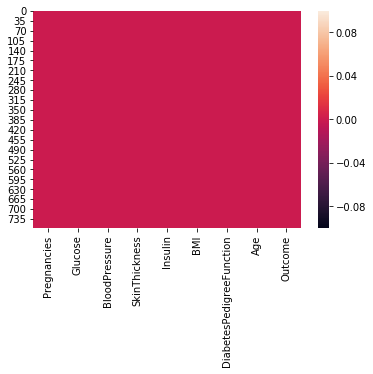

In [16]:
sns.heatmap(df.isnull())

In [21]:
df.iplot(kind='scatter',x='Glucose',y='Age',mode='markers',size=10,xTitle='Glucose',yTitle='Age')


In [22]:
df.iplot(kind='bar',x='Outcome',y='Pregnancies')

In [98]:
df.iplot(kind="histogram",theme="pearl",)

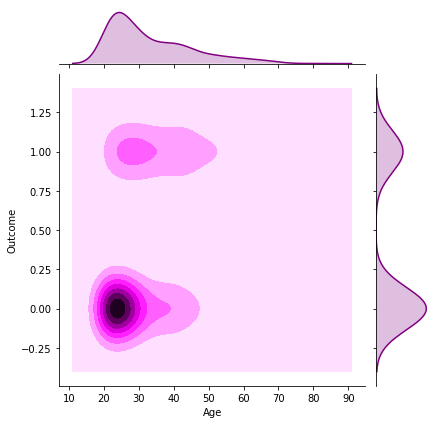

In [47]:
sns.jointplot("Age","Outcome",data=df,kind="kde",color='purple')

In [49]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(  df.drop("Outcome",axis=1), df['Outcome'], test_size=0.3, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression

In [85]:
log=LogisticRegression()
log.fit(X_train,y_train)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
pridict_lg=log.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

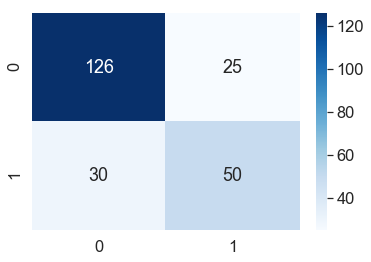

In [89]:
sns.set(font_scale=1.5)
cm = confusion_matrix( y_test,pridict_lg)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.show()

In [90]:
print(classification_report(y_test,pridict_lg))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.67      0.62      0.65        80

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



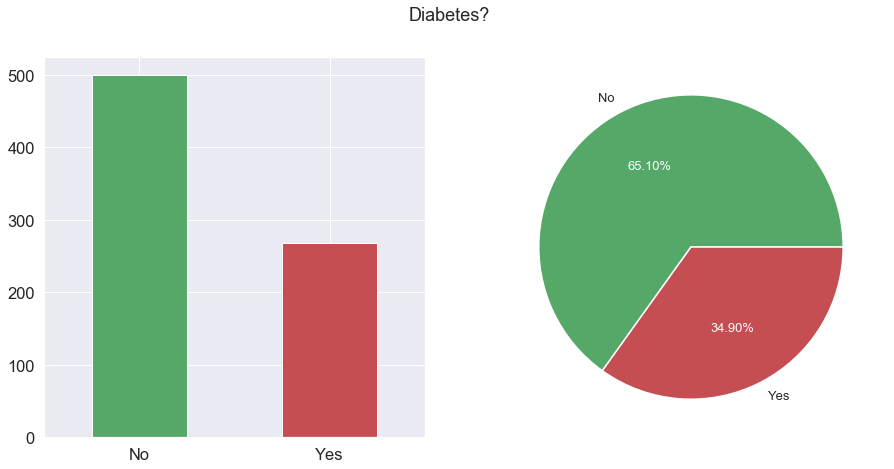

In [91]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[2], sns.color_palette()[3])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[2], sns.color_palette()[3]), wedgeprops = {"linewidth": 1.5, "edgecolor": "white"}), ax[1].texts[1].set_color("white"), ax[1].texts[3].set_color("white")

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning:

invalid value encountered in minimum

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kd

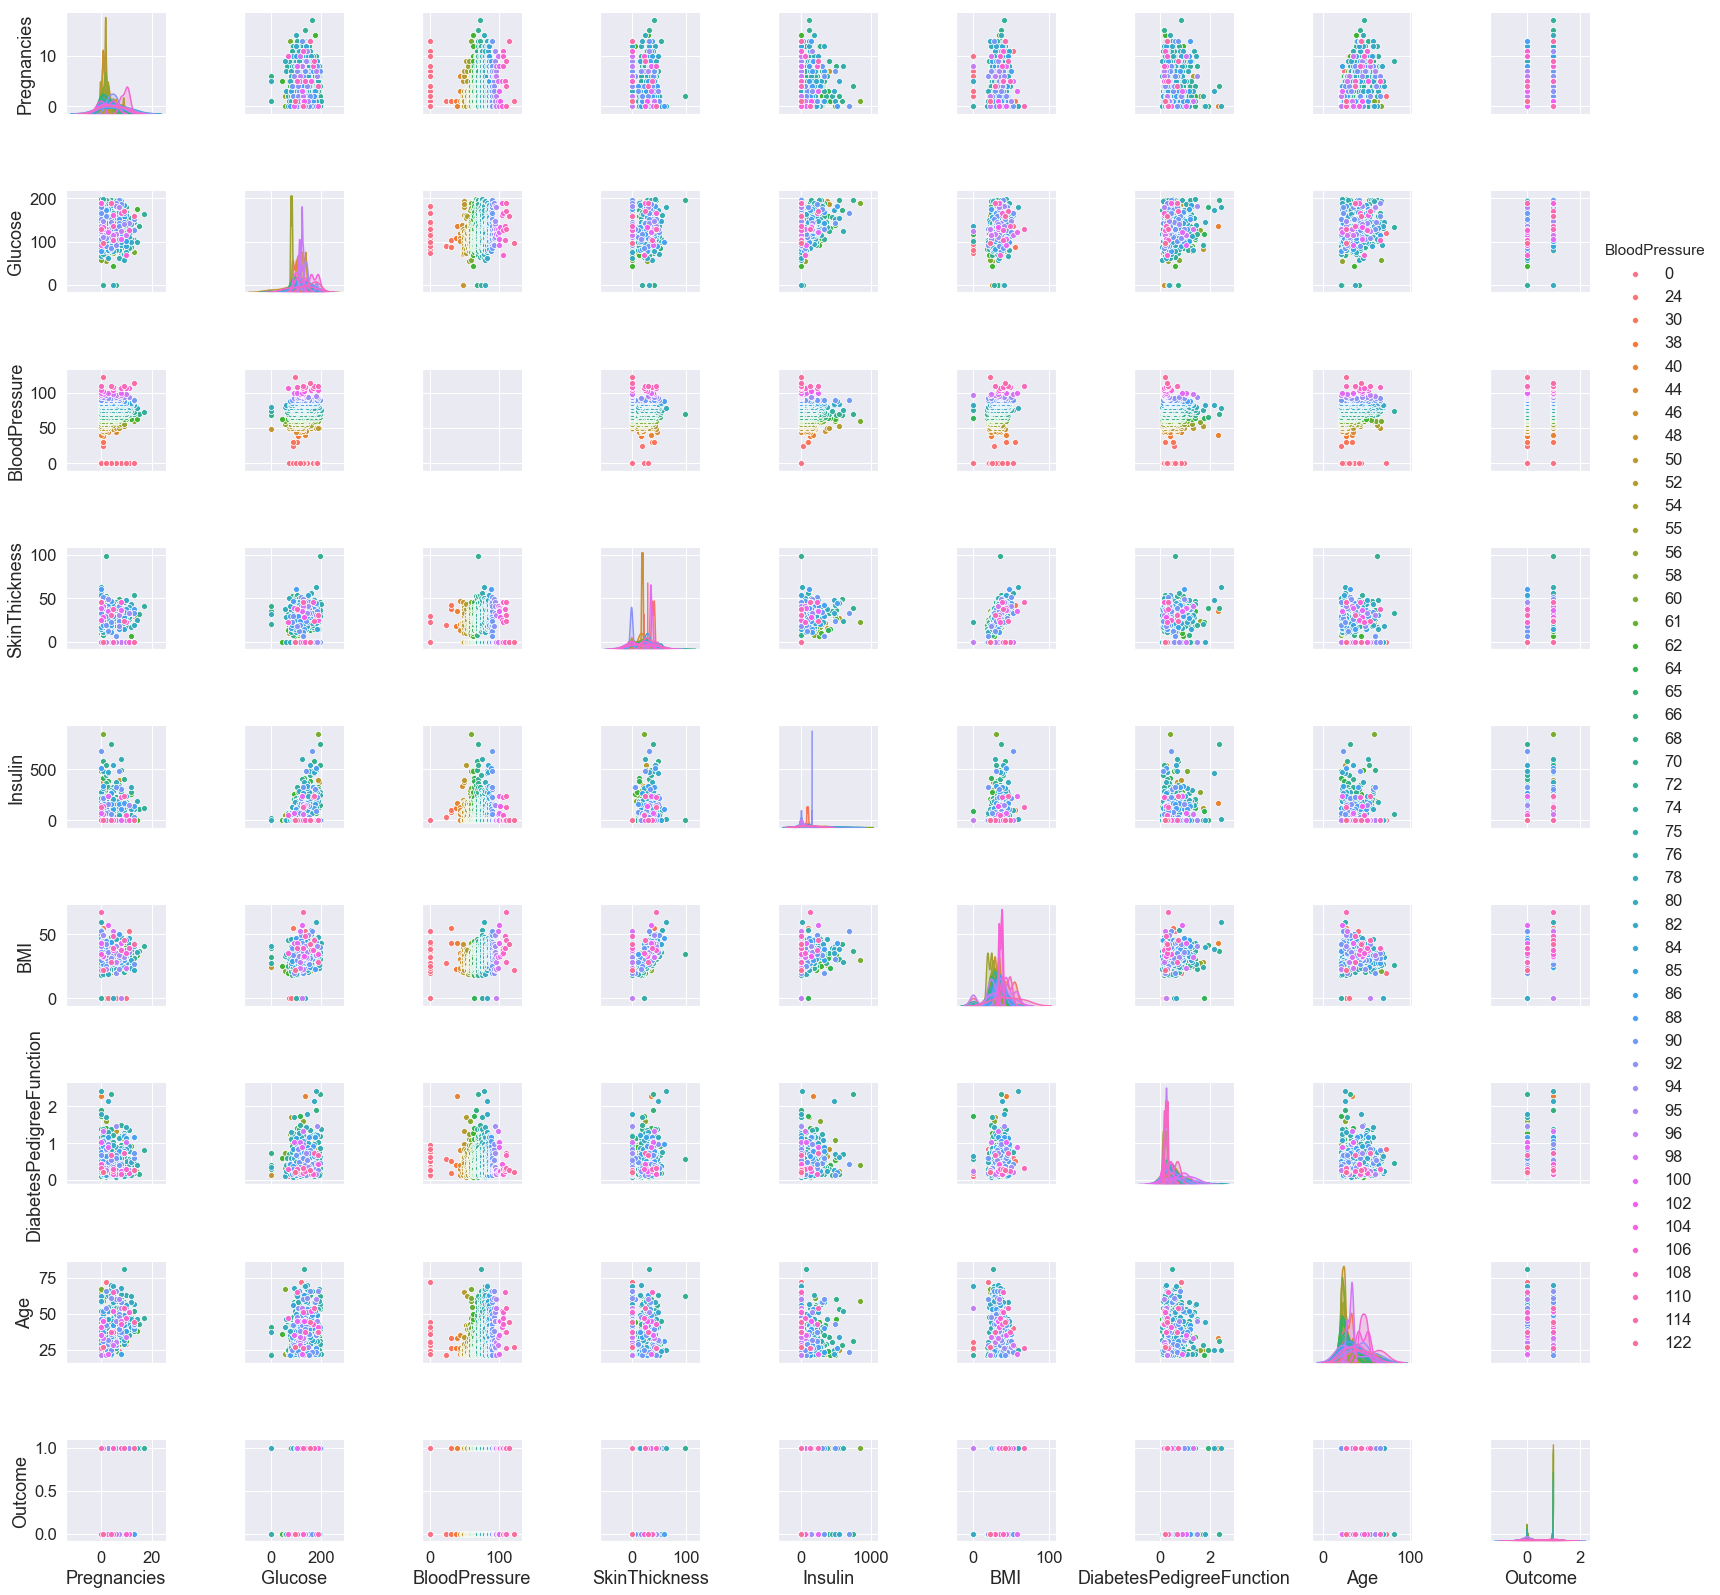

In [94]:
sns.pairplot(data=df,hue='BloodPressure')